# Attention Mechanism with custom input embedding

In [194]:
import numpy as np
from scipy.special import softmax

## Input Embedding

In [195]:
# These are the word embeddings of only 3 tokens with their positions in input
inp_emb1, pos1 = np.array([1,2,3,4]), 1
inp_emb2, pos2 = np.array([4,5,2,3]), 2
inp_emb3, pos3 = np.array([6,1,2,2]), 3

In "Attention is all you ne

In [196]:
# The dimension for model is 4, for simplicity.
dim_model = 4

## Positional Encoding

$$PE(pos_{2i}) = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)

$$PE(pos_{2i+1}) = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)

transformed word embedding: $$y_1 \cdot \sqrt{d_{\text{model}}}$$

In [371]:
dim_model = 4
def positional_encoding(inp_emb, pos):
    """
    This function outputs the positional encoding of the inputs.
    It first calculates the positional vector for each input using
    sin and cos functions. Then, adds the positional vector to a
    transformed word embedding.
    The transformed word embedding retains the word embedding info
    without being minimised by position information.
    """
    pos_enc = [0]*dim_model

    for i in range(0, dim_model-1, 2):
        term = pos/(10000**((2*i)/dim_model))
        pos_enc[i] = np.sin(term)
        pos_enc[i+1] = np.cos(term)

        transformed_word_emb = inp_emb*np.sqrt(dim_model)
        pos_enc[i] = pos_enc[i] + transformed_word_emb[i]
        pos_enc[i+1] = pos_enc[i+1] + transformed_word_emb[i+1]

    
    return pos_enc

In [198]:
pos_enc1 = positional_encoding(inp_emb1, pos1)
pos_enc2 = positional_encoding(inp_emb2, pos2)
pos_enc3 = positional_encoding(inp_emb3, pos3)

In [199]:
pos_enc1

[2.8414709848078967, 4.54030230586814, 6.000099999999834, 8.999999995]

In [200]:
pos_enc2

[8.909297426825681, 9.583853163452858, 4.000199999998666, 6.99999998]

In [201]:
pos_enc3

[12.141120008059866, 1.0100075033995546, 4.0002999999955, 4.999999955000001]

## Attention Layer

In [202]:
attention_input = np.array([pos_enc1, pos_enc2, pos_enc3])

In [203]:
attention_input

array([[ 2.84147098,  4.54030231,  6.0001    ,  8.99999999],
       [ 8.90929743,  9.58385316,  4.0002    ,  6.99999998],
       [12.14112001,  1.0100075 ,  4.0003    ,  4.99999996]])

Inside attention mechanism, each word vector has 3 representations: A query vector (Q), A key vector (K), and a value vector (V). Here,

Q = attention_input x W_Q

K = attention_input x W_K

V = attention_input x W_V

Q, K, and V are obtained from matrix multiplication of wight matricex and input matrix. Here, W_Q, W_K, W_V  are the weights for each vector learnt and updated during training.

Here, We use the initialsed values of these weight vectors.

In [357]:
# for future matrix multiplication the number of columns in first
#  matrix should be equal to the number of rows of the second matrix.
dim_model = 4
np.random.seed(12)
def initialise_weights(dim,n):
    W_Q = np.random.randint(n, size = (dim, dim))
    W_K= np.random.randint(n, size = (dim, dim))
    W_V = np.random.randint(n, size = (dim, dim))
    return W_Q, W_K, W_V

In [358]:
W_Q, W_K, W_V = initialise_weights(dim_model,5)

In [359]:
W_Q

array([[3, 3, 1, 2],
       [3, 3, 4, 0],
       [1, 4, 1, 2],
       [3, 2, 0, 0]])

In [360]:
W_K

array([[4, 2, 1, 3],
       [4, 3, 1, 0],
       [2, 2, 0, 4],
       [3, 1, 0, 0]])

In [361]:
W_V

array([[3, 3, 1, 3],
       [0, 1, 1, 0],
       [4, 0, 4, 1],
       [3, 4, 3, 3]])

In [362]:
Q = np.matmul(attention_input, W_Q)
K = np.matmul(attention_input, W_K)
V = np.matmul(attention_input, W_V)

In [363]:
Q

array([[55.14541986, 64.14571986, 27.00278021, 17.68314197],
       [80.47965171, 85.48025173, 51.24491008, 25.81899485],
       [58.4536824 , 65.45458244, 20.18145002, 32.28284002]])

In [364]:
K

array([[ 68.52729315,  40.30404888,   7.38177329,  32.52481295],
       [102.9730023 ,  61.57055432,  18.49315059,  42.72869228],
       [ 75.60510991,  40.31286248,  13.15112751,  52.42456002]])

In [365]:
V

array([[59.52481294, 49.06471524, 58.38217328, 41.52451294],
       [63.72869222, 64.31174536, 55.49395053, 51.72809222],
       [67.42455989, 57.43336735, 44.15232738, 55.42365989]])

### Calculating Attention

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V$$


In [300]:
def attention(Q,K,V, dim):
    Q_againt_Kvalues = np.matmul(Q, K.T) / np.sqrt(dim)
    softmax_score = softmax(Q_againt_Kvalues)
    final_attention = np.matmul(softmax_score, V)
    return final_attention
    
     

In [302]:
# here, dim_k = dim_model
attention(Q,K,V, dim_model)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [63.72869222, 64.31174536, 55.49395053, 51.72809222],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

# Attention mechanism using Word2Vec embeddings

In [303]:
sentence = "The big cat sat on the mat."

In [342]:
from gensim.models import Word2Vec

In [341]:
sentence = "The big cat sat on the mat"
data = sentence.lower().split()
data

['the', 'big', 'cat', 'sat', 'on', 'the', 'mat']

In [384]:
# using CBOW 
model = Word2Vec([data], min_count=1, vector_size=224, window=2)

embedding_dict = {}
for word in data:
    embedding_dict[word] = model.wv[word]

In [385]:
input_embeddings = np.array([
    embedding_dict[word] for word in data
])

In [386]:
input_embeddings.shape

(7, 224)

In [387]:
dim_model = 224
# pe = []*input_embeddings.shape[0]
pe = [positional_encoding(input_embeddings[i], i+1) for i in range(input_embeddings.shape[0])]
pe = np.array(pe)

In [388]:
pe.shape

(7, 224)

We're going to implement multi-head attention - with 4 heads (or 4 iterations in our case) and head dimension as 56.

In [415]:
W_Q, W_K, W_V = initialise_weights(56, 5)

In [416]:
W_Q.shape

(56, 56)

In [417]:
attention_inputs = []*4

In [419]:
input_embeddings.shape

(7, 224)

In [420]:
dim_head = 56
i = 0
inputs_for_heads = [[]]*4
for n in range(0,224,dim_head):
    head_input = np.array([input_embed[n:n+56] for input_embed in input_embeddings])
    # break
    inputs_for_heads[i] = head_input
    i += 1


In [421]:
np.array(inputs_for_heads).shape

(4, 7, 56)

In [422]:
Q = [[]] * 4
K = [[]] * 4
V = [[]] * 4

In [437]:
dim_head = 56
attention_outputs_from_heads = [[]]*4
i = 0
for head_input in inputs_for_heads:
    Q = np.matmul(head_input, W_Q)
    K = np.matmul(head_input, W_K)
    V = np.matmul(head_input, W_V)

    head_attention_output = attention(Q,K,V, dim_head)
    attention_outputs_from_heads[i] = head_attention_output
    i += 1
attention_outputs_from_heads = np.array(attention_outputs_from_heads)

In [438]:
attention_outputs_from_heads.shape

(4, 7, 56)

In [446]:
final_attention = np.hstack(attention_outputs_from_heads)

In [449]:
final_attention.shape

(7, 224)

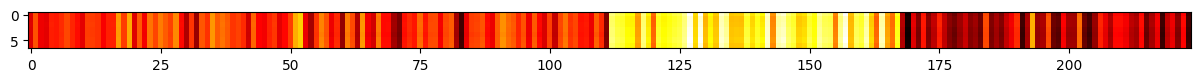

In [451]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(final_attention, cmap='hot')